First guess at a, b  5.0 3.5
First loss function is  7.890933746255283
Best a,b is  1.2036993070662023 3.310473877247611
Best loss function is  2.690376323682816


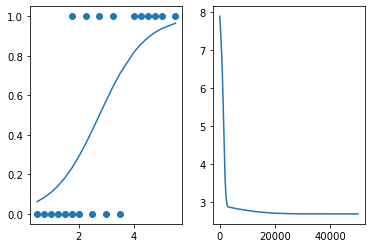

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Sigmoid finction that returns output between 0 and 1 (probability)
def logistic(x,a,b):
    return 1/(1.0+np.exp(-a*x+b))

# Loss function takes x and y_obs arrays, compares to y_model from logistic function to return SSR
def loss(x,y_obs,a,b):
    y_model = logistic(x,a,b)
    return np.sum( (y_model-y_obs)**2 )

# Arrays for logistic and loss functions
x = np.array( [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50] )
y_obs = np.array( [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1] )

# Assign weights for prediction randomly
a,b = 5.0,3.5
y_model = logistic(x,a,b)

print('First guess at a, b ',a,b)
print('First loss function is ',loss(x,y_obs,a,b))

# Autograd used to get the derivative of the gradiant
d_by_da = grad(loss,2)
d_by_db = grad(loss,3)

# Learning rate is how much the algorithm with move
# Smaller value is more accurate but will take more attempts
# Larger is faster but may miss local min
learning_rate = 0.001
# Same as epochs, how many times to run the algorithm
maximum_number_of_iterations = 50000

ssr = []
# Iterate through data and calulate the loss function with learning rate at current time
for iter in range(maximum_number_of_iterations):
    a -= learning_rate*d_by_da(x,y_obs,a,b)
    b -= learning_rate*d_by_db(x,y_obs,a,b)              
    y_model = logistic(x,a,b)
    ssr.append(loss(x,y_obs,a,b))
    
print('Best a,b is ',a,b)
print('Best loss function is ',loss(x,y_obs,a,b))

# Plot the graph
plt.subplot(1,2,1)
plt.scatter(x,y_obs)
plt.plot(x,y_model)

plt.subplot(1,2,2)
plt.plot(ssr)

plt.show()

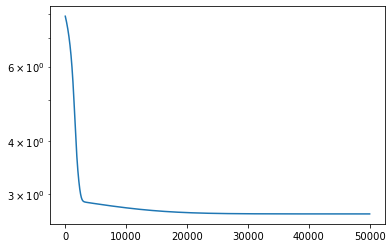

In [2]:
plt.semilogy(ssr)